### <u>Problem Statement</u> <a id='top' />

Attached is a dataset which shows the flower classification ML problem. The task is to predict the class of the plant based on certain features given in the excel file. The xlsx has 2 components one showing the variables data and another file showing the explanation of what each of these variables mean.

<b> Dataset</b>: Plant_Tree_data.xlsx 

For this problem, ignore the problem metrics. Ignore the units of tree length like mm or cm. For e.g. do not think that the tree length is in mm or cm. All the measures are metric-less (unit less) and for this problem treat each column in that capacity.

For the dataset, implement the Random Forest classifier using Python. [6M]

For the same dataset, implement classification with the neural network using Keras in Python. [6M]

The marks distribution is as follows

> Import the libraries and Load the dataset and Remove/replace missing values (if any) [1M]
> Split features and labels [0.5M]
> Split train and test data [0.5M]
> Implement Neural Network Classifier using Keras [2M]
> Calculate accuracy measures [2M]


### <u>Solution</u>:


### EDA (Exploratory Data Analysis)

> ###### - [Target Column](#target_col): Visualizing Distribution.
> > This is to visualize the target column to see if it is not an imbalanced class.
> ###### - [Missing Data](#missing_data): Check on features with Missing data.
> > This step is done to check the missing data at each feature level. This is required to identify which features requrie data imputation during Pre-processing step and if any feature needs to be dropped in case majority values are missing.
> ###### - [Univariate Analysis](#univariate): Plot the features distribution to identify skewness.
> > This helps in visualizing the distribution of features and helps in identifying skewed features. So, accordingly they can be treated during pre-processing before applying Normalization.
> ###### - [Bivariate Analysis](#bivariate): Plot the features against <u> Target </u> to visualize the relation.
> > This helps in visualizing the features in respect to Target column and at times helps in seeing if any feature can be further dropped.
> ###### - [Multicolinearity check](#multicolinearity): Identify if any features which are correlated with other features.
> > This is again an important step which helps in identifying features which are colinear with each other and thus all but one which are colinear among themselves can be ignored while training the model. 

### Data Preprocessing.

> ###### - [Data Imputation](#imputer): Imputing the missing values.
> > Features which contain the missing data, their missing values were imputed so model can be trained properly.
> ###### - [Data scaling/normalization](#scaling): Normalizing/ Scaling the data features.
> > Here, the features which are having skewed distribution can be treated with Log scaling and once the features are treated. They can be then by passed thru standard scalar to bring all features at same level before modelling. 

### Select Train/Test data.

> ###### - [Train-Test split](#train_test): Splitting the data into training set and testing set. Split ratio: 70 (training):30 (testing)
> > This is important as the data needs to be seperated out in 2 parts at least. Training and Test (70:30) set where Test set is kept aside just to validate the Model's performance and cannot be given or used while modeling at all.

### Training the model.

> ###### - [Training Model](#modelling): Training differnt models on training set.
> > Model (Decision tree classifier in this case) is then trained on the Training data set and is evaluated. 
> > Another model (Random Forest Classifier which uses Bagging technique) is then trained to observe if major improvements are observed.

### Model Evaluation.

> ###### - [Model Evaluation](#model_eval): Evaluating the performance of the model and finalizing the model.
> > This helps in identifying which Model is performing better as well as generalized so its Accuary, precision, recall & F1 scores can be maintained on future unseen data as well.


In [59]:
# importing libraries
import pandas as pd
import numpy as np

# For Modeling, Evaluation metrics, train-test data preparation
from sklearn.metrics import auc, confusion_matrix, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For Data imputation
from sklearn import impute
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# settings
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
sns.set(style="whitegrid")

In [2]:
# Load the dataset
raw_df = pd.read_excel("Plant_Tree_data.xlsx")

In [3]:
#Visualizing header rows
raw_df.head()

,LeafLength,LeafBreadth,ErrorLeafLength,ErrorLeafBreadth,LeafCurveAngle,EdgeCurvatureAngle,ErrorLeafCurvature,TreeLength,TreeType
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
raw_df.describe()

,LeafLength,LeafBreadth,ErrorLeafLength,ErrorLeafBreadth,LeafCurveAngle,EdgeCurvatureAngle,ErrorLeafCurvature,TreeLength,TreeType
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [9]:
# Looking at columns counts, nulls, Dtypes and Index range
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LeafLength          17898 non-null  float64
 1   LeafBreadth         17898 non-null  float64
 2   ErrorLeafLength     17898 non-null  float64
 3   ErrorLeafBreadth    17898 non-null  float64
 4   LeafCurveAngle      17898 non-null  float64
 5   EdgeCurvatureAngle  17898 non-null  float64
 6   ErrorLeafCurvature  17898 non-null  float64
 7   TreeLength          17898 non-null  float64
 8   TreeType            17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [10]:
# Creating a copy of Raw DF for EDA
df_eda = raw_df.copy()

### EDA (Exploratory Data Analysis)

#### 1. <u>Target column</u>: Visualizing distribution <a id='target_col'/>

   TreeType  Counts    pct
0         0   16259  90.84
1         1    1639   9.16
 


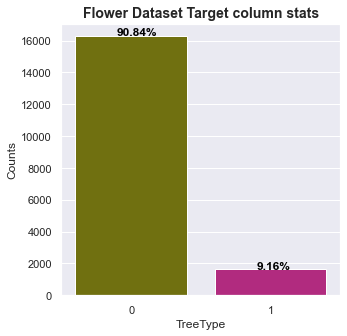

In [37]:
sns.set(style="darkgrid")
targetcoldf = raw_df.groupby('TreeType').agg({'TreeType':['count']}).reset_index()
targetcoldf.columns = ['TreeType','Counts']
targetcoldf['pct'] = round(targetcoldf['Counts']/(len(raw_df))*100,2)
palette = ['olive','mediumvioletred']
print (targetcoldf.head())
print (" ")
fig, ax = plt.subplots(figsize=(5,5))
fig = sns.barplot(y='Counts', x='TreeType',data=targetcoldf, ci = None, orient='v', palette=palette)

# y_lab = ['Negative', 'Positive']
# ax.set_xticklabels(labels=y_lab, ha='right')

for i, v in enumerate(targetcoldf['pct']):
    ax.text(i-0.1, v*180, str(v)+'%', color='black', fontweight='bold')

plt.title('Flower Dataset Target column stats',size = 14, weight = 'bold')
plt.ylabel('Counts')
plt.xlabel('TreeType');


##### <u>Observation</u>:
> The Target column distribution looks imbalanced. In case, the model isn't able to capture minority class, then can look for Oversampling/Undersampling techiniques.

#### 2. <u>Missing Data</u>: Check on features with Missing data. <a id='missing_data' />

In [39]:
def get_missing_data_stats(df):
    missing_data = df.isin([-99, -999, np.nan]).sum()
    per_missing_data = round(missing_data/len(df)*100,2).sort_values(ascending=False)
    if (len(per_missing_data[per_missing_data > 0]) > 0):
        print ('Below are columns with correspondind missing data %s:')
        print ('-----------------------------------------------------')
        print ('Column ~ Missing %')
        print ('-------------------')
        print (per_missing_data[per_missing_data > 0])
        print ('-------------------')

        plt.subplots(figsize=(9,9))
        sns.heatmap(df.isin([-99, -999, np.nan]))
        plt.show()
    else:
        print ('------------------------------')
        print ('No column has missing data :-)')
        print ('------------------------------')

In [44]:
get_missing_data_stats(raw_df)

------------------------------
No column has missing data :-)
------------------------------


##### <u><b>Observation</b></u> :
> No missing data in the dataset.

#### Univariate Analysis - Plot the features distribution to identify skewness.<a id='univariate' />

### Split features and labels [0.5M]

In [46]:
# Copy raw_df to features_df and drop Target column to keep only features column in it
features_df = raw_df.copy()
features_df.drop(axis='1', columns='TreeType', inplace=True)

# Copy only target column to labels df
labels_df = raw_df['TreeType'].copy()

### Split train and test data [0.5M]

### Train/Test data split: <a id='train_test' />
> - Split data in train and test set

In [47]:
from sklearn.model_selection import train_test_split, validation_curve

X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.3, random_state=41)

### Modelling <a id='modelling' />

> - Fit the model

In [53]:
print ('=================================')
print ('Total Data Shape: ', raw_df.shape)
print ('=================================')
print ('Train Data Shape: ', X_train.shape)
print ('Test Data Shape:  ', X_test.shape)
print ('=================================')

Total Data Shape:  (17898, 9)
Train Data Shape:  (12528, 8)
Test Data Shape:   (5370, 8)


In [84]:
# Create Model using RandomForest Classifier

model_rf = RandomForestClassifier(n_estimators=23, criterion='gini',random_state=42)
model_rf.fit(X=X_train, y=y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=23,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### Model Evaluation:
> - Check Accuarcy/Precision/Recall
> - Predict on test set and match with result 
> - Visualizing model structure

In [85]:
# Predict on test data using RandomForest Tree classifier

model_rf.fit(X_train, y_train)
y_predict_rf = model_rf.predict(X=X_test)

Accuracy of classifier is : 0.9783985102420857
              precision    recall  f1-score   support

     class_0       0.98      0.99      0.99      4895
     class_1       0.91      0.84      0.87       475

    accuracy                           0.98      5370
   macro avg       0.95      0.92      0.93      5370
weighted avg       0.98      0.98      0.98      5370



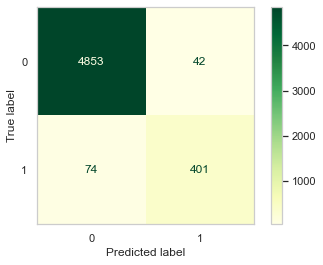

In [86]:
# validate accuracy of RandomForest Classifier

print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=y_predict_rf))
print (classification_report(y_true=y_test, y_pred=y_predict_rf, target_names=['class_0','class_1']))
plot_confusion_matrix(estimator=model_rf, X=X_test, y_true=y_test, values_format='.0f',cmap='YlGn')
plt.grid(False)

Accuracy of classifier is : 0.9789571694599628
              precision    recall  f1-score   support

     class_0       0.98      0.99      0.99      4895
     class_1       0.91      0.84      0.88       475

    accuracy                           0.98      5370
   macro avg       0.95      0.92      0.93      5370
weighted avg       0.98      0.98      0.98      5370



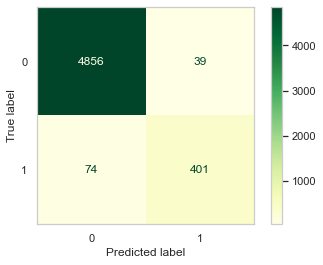

In [82]:
# validate accuracy of RandomForest Classifier
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=y_predict_rf))
print (classification_report(y_true=y_test, y_pred=y_predict_rf, target_names=['class_0','class_1']))
plot_confusion_matrix(estimator=model_rf, X=X_test, y_true=y_test, values_format='.0f',cmap='YlGn')
plt.grid(False)